In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/TNSSDC Data science/TNSSDC ds datasets/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={"Genre":"Gender"},inplace=True)

In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Let's look at the correlations

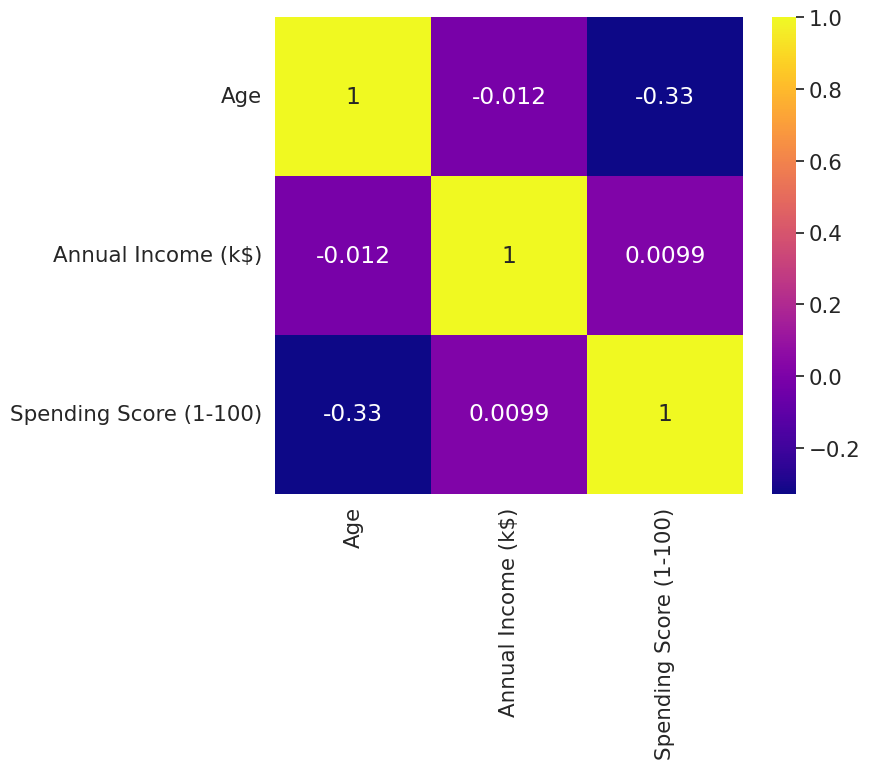

In [ ]:
cor=df.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(9,8))
sns.heatmap(cor,annot=True,cmap="plasma")
#sns.heatmap(cor,cmap="plasma")
plt.tight_layout();
plt.show();

It is clear from this correlation table that older customers have less income and therefore spend less money

<Axes: title={'center': 'Annual income'}, xlabel='Annual Income (k$)', ylabel='Density'>

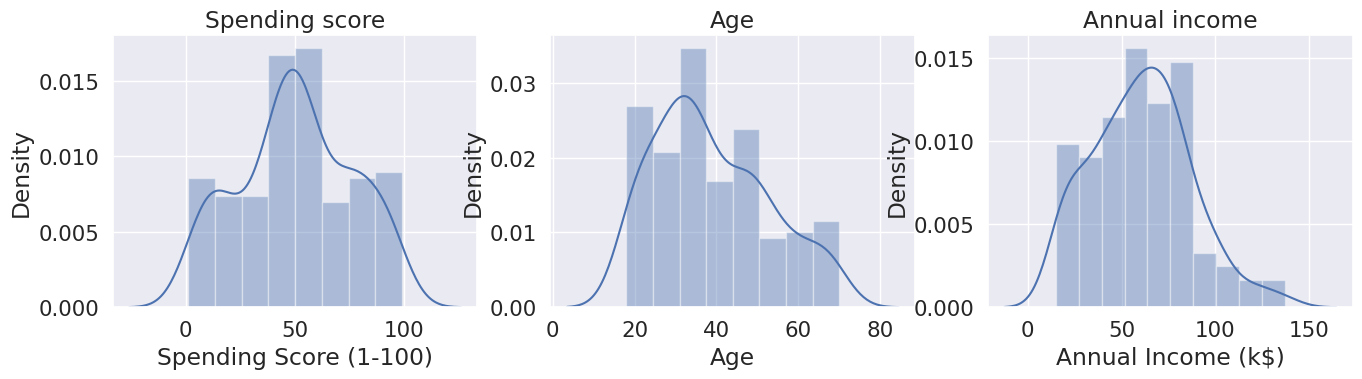

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(3,3,1)
plt.title("Spending score")
sns.distplot(df['Spending Score (1-100)'])

plt.subplot(3,3,2)
plt.title("Age")
sns.distplot(df["Age"])

plt.subplot(3,3,3)
plt.title("Annual income")
sns.distplot(df["Annual Income (k$)"])

The distributions are generally similar to the normal distribution , with  only a few standrd deviation. The 'more  normal' distribution among the distributions is the 'spending score' . That's good because it's our target column

In [ ]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df["Gender"]=encoder.fit_transform(df["Gender"])

In [ ]:
df["Gender"].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


As you can see , we converted the Gender column to Numeric using label encoding

Male--> 1
female -->0

In [ ]:
spending_score_male=0
spending_score_female=0

for i in range(len(df)):
  if df["Gender"][i]==1:
    spending_score_male=spending_score_male+df['Spending Score (1-100)'][i]
  if df["Gender"][i]==0:
    spending_score_female=spending_score_female+df['Spending Score (1-100)'][i] 

print(f"Male spending score is :{ spending_score_male}") 

print(f"Female spending score is :{ spending_score_female}")        

Male spending score is :4269
Female spending score is :5771


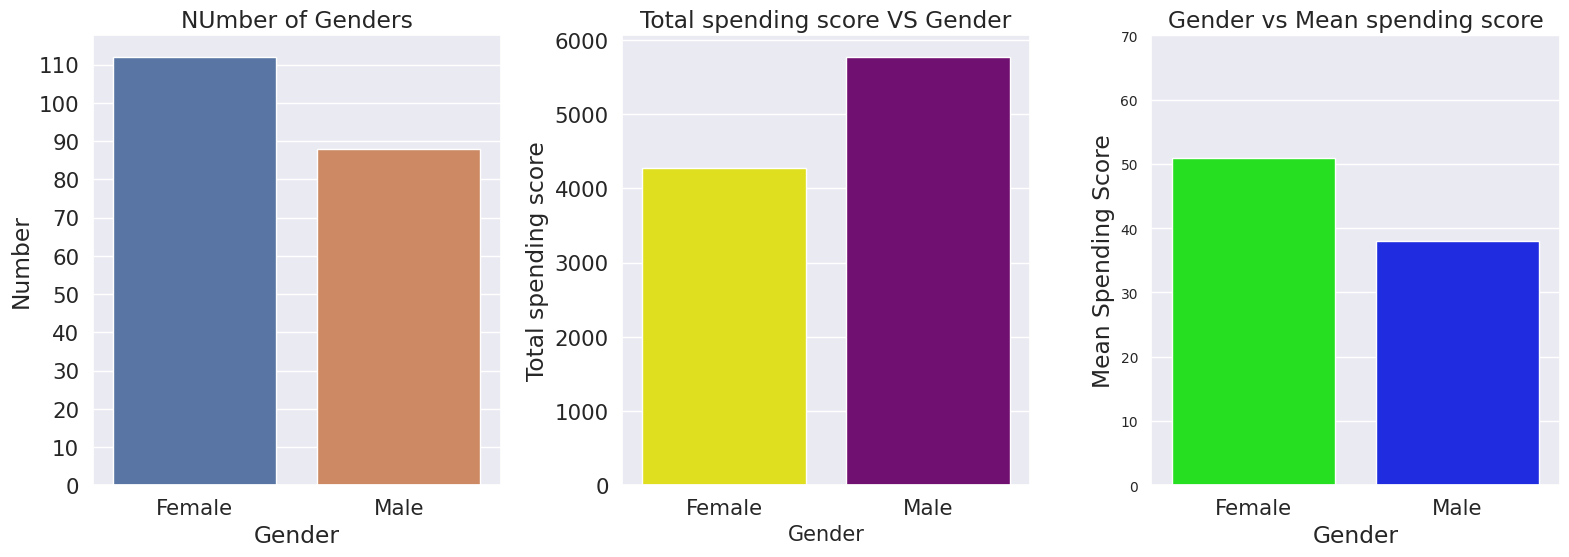

In [ ]:
plt.figure(figsize=(16,16))
plt.subplot(3,3,1)
plots=sns.barplot(x=["Female","Male"],y=df.Gender.value_counts(),data=df)
plt.xlabel("Gender")
plt.ylabel("Number")
plt.yticks(np.arange(0,116,10))
plt.title("NUmber of Genders")


list_genders_spending_score=[int(spending_score_male),int(spending_score_female)]
series_genders_spending_score=pd.Series(data=list_genders_spending_score)


plt.subplot(3,3,2)
plots=sns.barplot(x=["Female","Male"],y=series_genders_spending_score,palette=["yellow","purple"])
plt.xlabel("Gender",size=15)
plt.ylabel("Total spending score")
plt.yticks(np.arange(0,6001,1000))
plt.title("Total spending score VS Gender")

list_genders_spending_score_mean=[int(spending_score_female/df["Gender"].value_counts()[0]),int(spending_score_male/df["Gender"].value_counts()[0])]
series_genders_spending_score_mean=pd.Series(data=list_genders_spending_score_mean)

plt.subplot(3,3,3)
plots=sns.barplot(x=["Female","Male"],y=series_genders_spending_score_mean,palette="hsv")
plt.xlabel("Gender")
plt.ylabel("Mean Spending Score")
plt.yticks(np.arange(0,71,10),size=10)
plt.title("Gender vs Mean spending score")
plt.tight_layout()
plt.show()

what do we understand from these 3 graphs?
There is no significant difference in the mean spending scores of males and females . Sincethe mean spending score close to eachother, the difference between the total spending scores is difference between the number of male and female customers, but this difference is not serious much. considering all this , it will be meaaning less to choose gender based target audience

Text(0.5, 1.0, 'Age vs Spending score')

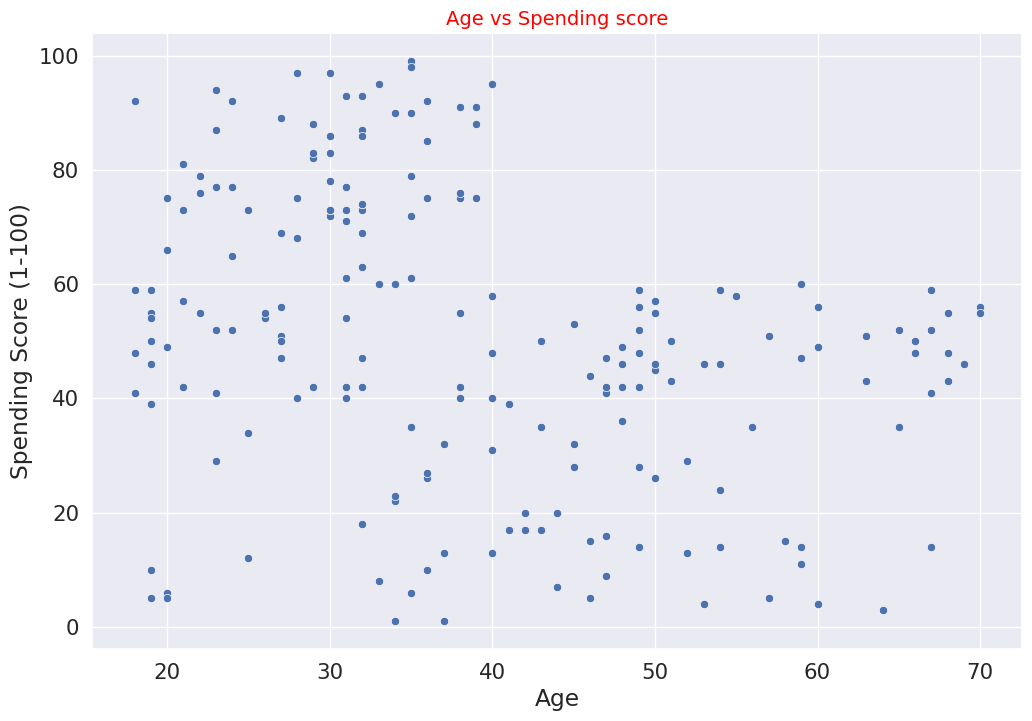

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df["Age"],y=df['Spending Score (1-100)'])
plt.title("Age vs Spending score",size=14,color="red")

People between the ages of 20-30 have made more purchases , considering the difference we just made about women, we can make our target audience more specific

<Axes: xlabel='Age', ylabel='Count'>

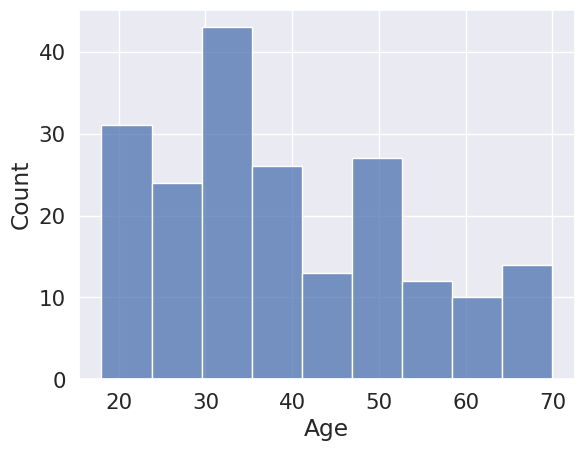

In [ ]:
sns.histplot(x=df["Age"],data=df)

# Let's look at the relationship between annual income and spending score

Text(0.5, 1.0, 'Annual income vs Spending score')

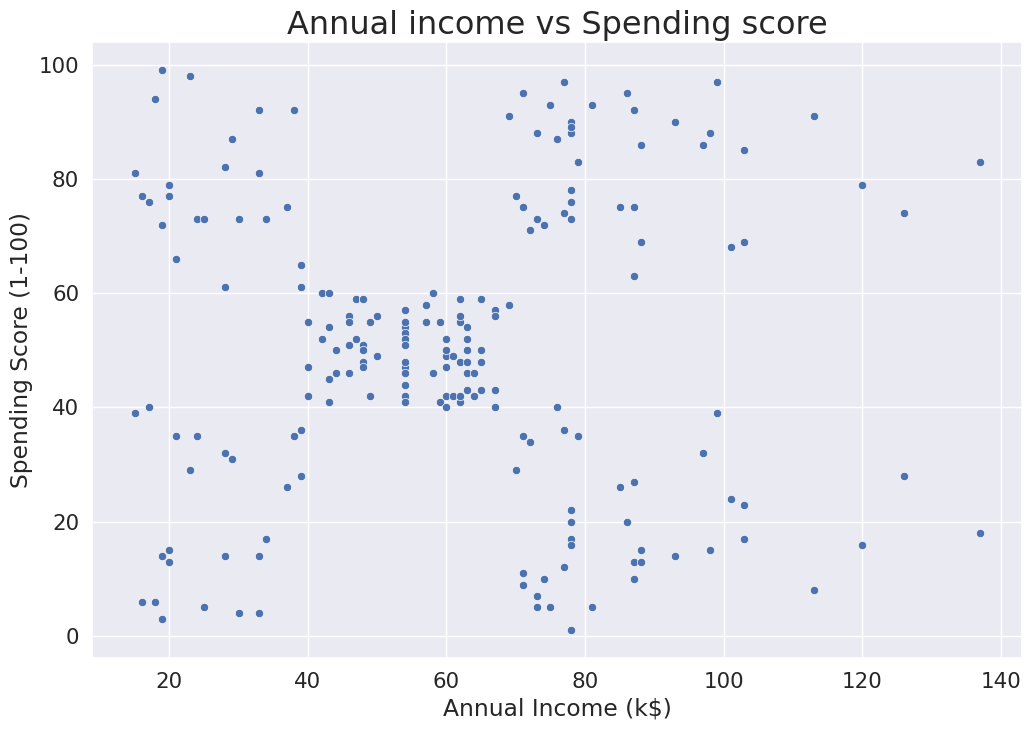

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],palette="red")
plt.title("Annual income vs Spending score",size=23)

Choosing the number of clusters

In [ ]:
X=df.iloc[:,[2,3]].values

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

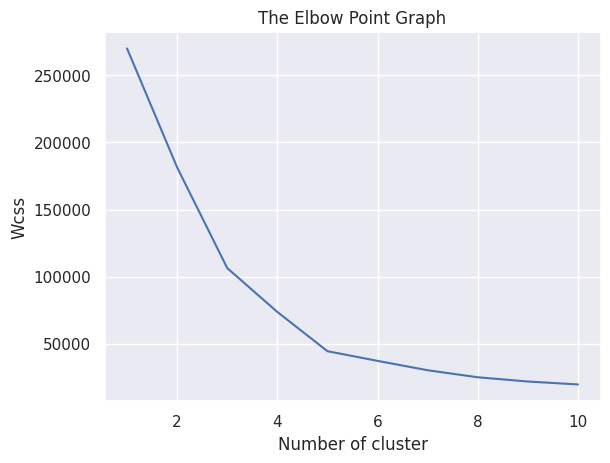

In [ ]:
#plot the elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of cluster")
plt.ylabel("Wcss")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=0)
# return a  label for each data point based on their cluster
Y=kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

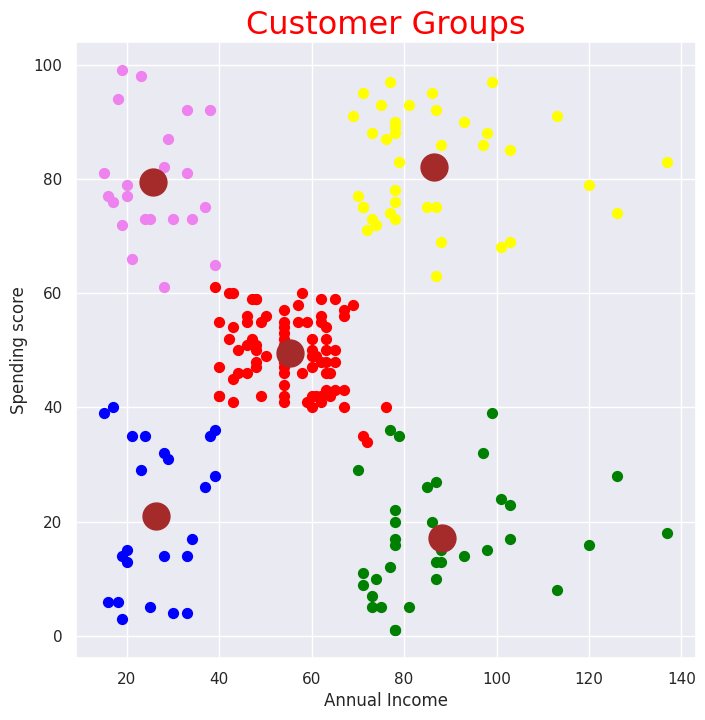

In [ ]:

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c="green",label="Cluster 1")
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c="red",label="Cluster 2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c="yellow",label="Cluster 3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c="violet",label="Cluster 4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c="blue",label="Cluster 5")

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=375,c="brown", label="Centroids")
plt.title("Customer Groups", color="red", fontsize="23")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.show()

In [ ]:
# To predict the entered data to which cluster it belongs to 
a=[[15,39]]
s=kmeans.predict(a)
print(s)

[4]
